## Q1: Markov chain

In [1]:
import numpy as np
np.__config__.show()
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

import random
import matplotlib.pyplot as plt
from numba import njit
import multiprocessing, pathos.multiprocessing
from tqdm.notebook import tqdm
import os
import time

Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /opt/_internal/cpython-3.12.7/lib/python3.12/site-packages/scipy_openblas64/include
    lib directory: /opt/_internal/cpython-3.12.7/lib/python3.12/site-packages/scipy_openblas64/lib
    name: scipy-openblas
    openblas configuration: OpenBLAS 0.3.27  USE64BITINT DYNAMIC_ARCH NO_AFFINITY
      Haswell MAX_THREADS=64
    pc file directory: /project/.openblas
    version: 0.3.27
  lapack:
    detection method: pkgconfig
    found: true
    include directory: /opt/_internal/cpython-3.12.7/lib/python3.12/site-packages/scipy_openblas64/include
    lib directory: /opt/_internal/cpython-3.12.7/lib/python3.12/site-packages/scipy_openblas64/lib
    name: scipy-openblas
    openblas configuration: OpenBLAS 0.3.27  USE64BITINT DYNAMIC_ARCH NO_AFFINITY
      Haswell MAX_THREADS=64
    pc file directory: /project/.openblas
    version: 0.3.27
Compilers:
  c:
    commands: cc
    linker: ld.bfd
    na

In [44]:
def GenerateDay(self) :
        self.TypeDays[self.Today] += 1

        if self.Today == 0 :
            rand = random.random()
            if rand < 0.9 :
                self.Today = 0 
            elif rand < 0.975 :
                self.Today = 1 
            else :
                self.Today = 2

        if self.Today == 1 :
            rand = random.random()
            if rand < 0.15 :
                self.Today = 0 
            elif rand < 0.95 :
                self.Today = 1 
            else :
                self.Today = 2

        if self.Today == 2 :
            rand = random.random()
            if rand < 0.25 :
                self.Today = 0 
            elif rand < 0.5 :
                self.Today = 1 
            else :
                self.Today = 2

        return self.Today,self.CurrentFraction()

def GenerateMultipleDays(self,days) :
    results = np.zeros((days,3))
    for i in range(days) :
        __,fractions = GenerateDay(self)
        results[i,:] = fractions
        
    return results
        
class Market :
    
    def __init__(self) :
        self.TypeDays = [0,0,0] #Pos 0 -> Bull, Pos 1 -> Bear, Pos 2 -> Stagnant
        self.Today = random.randint(0,2)

    def CurrentFraction(self) :
        total = sum(self.TypeDays)
        return np.array(self.TypeDays)/total

    def Plot(self) :
        labels = ["Bull Market","Bear Market","Stagnant Market"]
        plt.bar(labels,self.TypeDays,width=0.5, align='center', edgecolor='black')
        plt.show()

In [45]:
repetitions = 1_000_000

MarketObj = Market()
results = GenerateMultipleDays(MarketObj,repetitions)
Bull_fractions = [results[0] for results in results]
Bear_fractions = [results[1] for results in results]
Stagnant_fractions = [results[2] for results in results]

In [46]:
%%timeit

MarketObj = Market()
results = GenerateMultipleDays(MarketObj,repetitions)
Bull_fractions = [results[0] for results in results]
Bear_fractions = [results[1] for results in results]
Stagnant_fractions = [results[2] for results in results]

3.14 s ± 47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


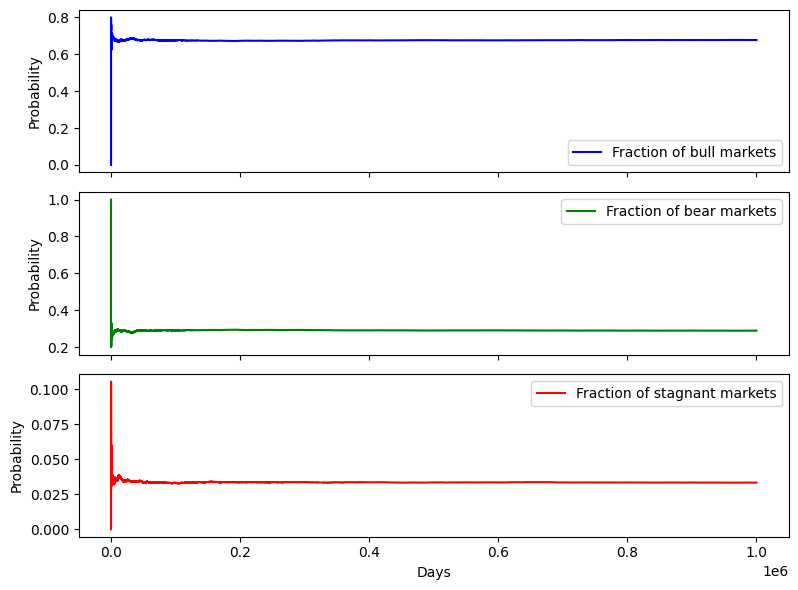

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 6))

x = np.linspace(0,repetitions,repetitions)

# Plot on each subplot
ax1.plot(x, Bull_fractions, label='Fraction of bull markets', color='blue')
ax2.plot(x, Bear_fractions, label='Fraction of bear markets', color='green')
ax3.plot(x, Stagnant_fractions, label='Fraction of stagnant markets', color='red')

# Add labels and legends
ax1.set_ylabel('Probability')
ax2.set_ylabel('Probability')
ax3.set_ylabel('Probability')
ax3.set_xlabel('Days')

ax1.legend()
ax2.legend()
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

It is converging as expected

In [48]:
@njit
def CurrentFraction(TypeDays):
    total = np.sum(TypeDays)
    fractions = np.empty(3)
    for i in range(3):
        fractions[i] = TypeDays[i] / total
    return fractions

@njit
def Fast_GenerateDay(TypeDays,Today) :
        TypeDays[Today] += 1

        if Today == 0 :
            rand = np.random.rand()
            if rand < 0.9 :
                Today = 0 
            elif rand < 0.975 :
                Today = 1 
            else :
                Today = 2

        if Today == 1 :
            rand = random.random()
            if rand < 0.15 :
                Today = 0 
            elif rand < 0.95 :
                Today = 1 
            else :
                Today = 2

        if Today == 2 :
            rand = random.random()
            if rand < 0.25 :
                Today = 0 
            elif rand < 0.5 :
                Today = 1 
            else :
                Today = 2

        return Today,CurrentFraction(TypeDays)

@njit
def Fast_GenerateMultipleDays(TypeDays, Today, days):
    results = np.zeros((days, 3))

    for i in range(days):
        Today , fractions = Fast_GenerateDay(TypeDays, Today)
        results[i, 0] = fractions[0]
        results[i, 1] = fractions[1]
        results[i, 2] = fractions[2]
        
    return results

In [49]:
TypeDays = np.zeros(3)
Today = random.randint(0,2)
results = Fast_GenerateMultipleDays(TypeDays,Today,repetitions)
Bull_fractions = [results[0] for results in results]
Bear_fractions = [results[1] for results in results]
Stagnant_fractions = [results[2] for results in results]

In [50]:
%%timeit
TypeDays = np.zeros(3)
Today = random.randint(0,2)
results = Fast_GenerateMultipleDays(TypeDays,Today,repetitions)
Bull_fractions = [results[0] for results in results]
Bear_fractions = [results[1] for results in results]
Stagnant_fractions = [results[2] for results in results]

525 ms ± 688 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Around 6 times faster: from 3s to 500 ms**

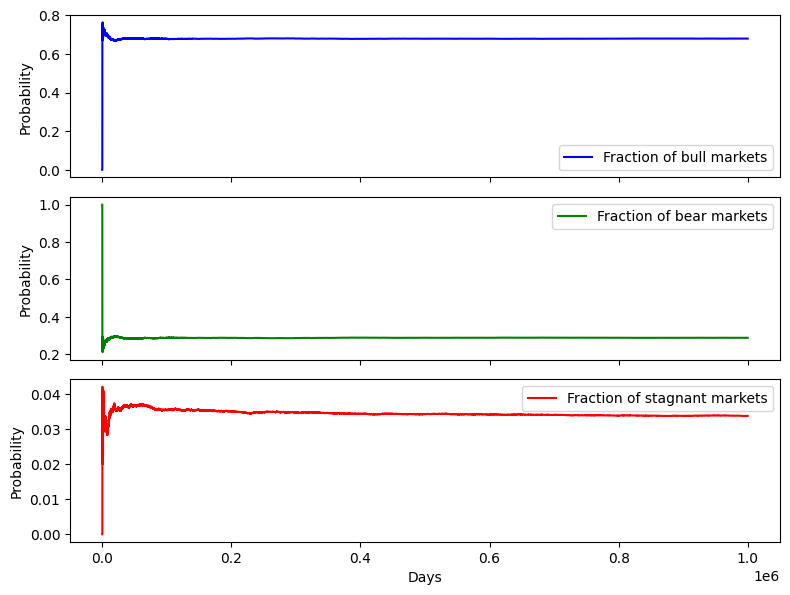

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 6))

x = np.linspace(0,repetitions,repetitions)

# Plot on each subplot
ax1.plot(x, Bull_fractions, label='Fraction of bull markets', color='blue')
ax2.plot(x, Bear_fractions, label='Fraction of bear markets', color='green')
ax3.plot(x, Stagnant_fractions, label='Fraction of stagnant markets', color='red')

# Add labels and legends
ax1.set_ylabel('Probability')
ax2.set_ylabel('Probability')
ax3.set_ylabel('Probability')
ax3.set_xlabel('Days')

ax1.legend()
ax2.legend()
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Q3: Scaling  
I am using a code I written. Its purpose is to calculate the time of flight (ToF) of a photon generated in a random point inside the JUNO detector.
The goal was to calculate the ToFs using the simple calculation reported here, then making a more complex calculation taking into account the difference in index of refraction between water and scintillator liquid in the detector in order to evaluate if the difference was significative or this simplified calculation had sufficient precision.

Note : JUNO is a spherical detector, with a radius of 20 m. The internal part is filled with liquid scintillator, but there is a small shell of water (1.5 m of thickness) at the edge that could impact the ToF calculations. I wanted to determine how big was this impact. Here I have written only the code used to make the most simple calculation possible, that is assuming I can use only the scintillator refracting index for the whole calculation. 

In [2]:
R_JUNO = 19.4
R_FV = 14
R_LS = 17.7 
n_scint = 1.51303
n_water = 1.33
c = 299792458

def distance(x,y,z,x1,y1,z1) :
        return np.sqrt((x-x1)**2 + (y-y1)**2 + (z-z1)**2)

def intersection (x,y,z,x_dir,y_dir,z_dir,R) : 
    denom = 2*(x_dir**2+y_dir**2+z_dir**2)
    sroot = (2*x*x_dir + 2*y*y_dir + 2*z*z_dir)**2 - 4*(x_dir**2 + y_dir**2 + z_dir**2)*(x**2+y**2+z**2-R**2)
    num = -(2*x*x_dir + 2*y*y_dir + 2*z*z_dir) + np.sqrt(sroot)
        
    t = num/denom
    x_out = x+x_dir*t
    y_out = y+y_dir*t
    z_out = z+z_dir*t
        
    return x_out,y_out,z_out

def simple_path_time (x,y,z,x_onPMT,y_onPMT,z_onPMT) :
    return (distance(x,y,z,x_onPMT,y_onPMT,z_onPMT)/c*n_scint) * 10**9
    
def spherical_to_cartesian(r,theta,phi) :
    x= r*np.sin(phi)*np.cos(theta)
    y= r*np.sin(phi)*np.sin(theta)
    z= r*np.cos(phi)
    return x,y,z

def cartesian_to_spherical (x,y,z) :
    r = np.sqrt(x**2+y**2+z**2)
    if (r != 0) :
        phi = np.arccos(z/r)
        theta = np.arctan2(y,x) 
    else :
        phi = 0
        theta = 0
            
    return r,theta,phi

def CalculateEffective_n (arg) :

    R, theta, phi, theta_dir, phi_dir = arg
    x,y,z = spherical_to_cartesian(R,theta,phi)
    x_dir,y_dir,z_dir = spherical_to_cartesian(1,theta_dir,phi_dir)
        
    x_onLs,y_onLs,z_onLs = intersection(x,y,z,x_dir,y_dir,z_dir,R_LS)
    x_onPMT,y_onPMT,z_onPMT = intersection(x,y,z,x_dir,y_dir,z_dir,R_JUNO)
        
    ToF = simple_path_time(x,y,z,x_onPMT,y_onPMT,z_onPMT)
 
    return ToF

In [3]:
start = time.time()
MaxRadius = 15.
N = 10_000
Rs = MaxRadius*np.random.uniform(0,1,size=N)
Thetas = np.random.uniform(0,2*np.pi,size=N)
Phis = np.arccos(1-2*np.random.uniform(0,1,size=N))

Theta_dirs = np.random.uniform(0,2*np.pi,size=N)
Phi_dirs = np.arccos(1-2*np.random.uniform(0,1,size=N))

ToFs = list(map(CalculateEffective_n,zip(Rs,Thetas,Phis,Theta_dirs,Phi_dirs)))

end = time.time()
Time_taken = end - start

print(f"It took {Time_taken:.2f} s ")

It took 0.14 s 


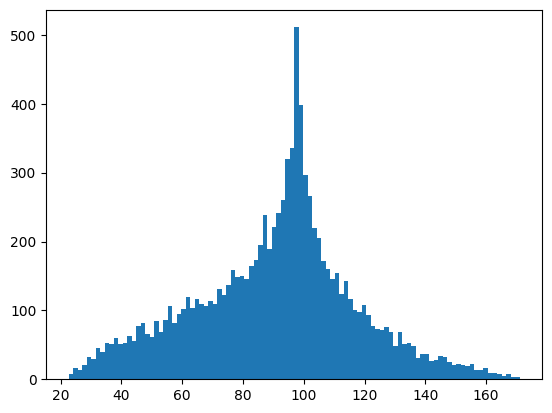

In [4]:
plt.hist(ToFs,bins=100)
plt.show()

In [5]:
multiprocessing.cpu_count()

8

I have 8 cores in my machine

In [6]:
Times = []


for CPU in range(1,15) :

    start = time.time()
    parmap = pathos.multiprocessing.ProcessingPool(CPU).imap
    ToFs = list(tqdm(parmap(CalculateEffective_n,zip(Rs,Thetas,Phis,Theta_dirs,Phi_dirs)),total=N))
    end = time.time()
    Times.append(end-start)
    print(f"For {CPU} CPUs it took {end-start:.2f} s ")

  0%|          | 0/10000 [00:00<?, ?it/s]

For 1 CPUs it took 4.86 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 2 CPUs it took 4.92 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 3 CPUs it took 4.77 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 4 CPUs it took 5.04 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 5 CPUs it took 5.23 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 6 CPUs it took 5.66 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 7 CPUs it took 5.59 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 8 CPUs it took 6.04 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 9 CPUs it took 5.81 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 10 CPUs it took 5.50 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 11 CPUs it took 5.31 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 12 CPUs it took 5.43 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 13 CPUs it took 5.33 s 


  0%|          | 0/10000 [00:00<?, ?it/s]

For 14 CPUs it took 6.66 s 


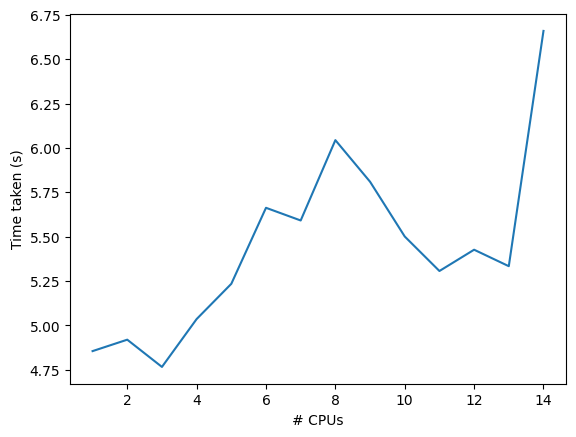

In [7]:
plt.plot(np.arange(1,15),Times)
plt.ylabel("Time taken (s)")
plt.xlabel("# CPUs")
plt.show()

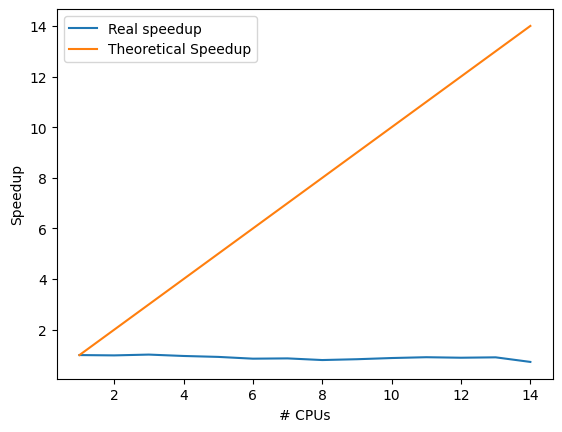

In [8]:
Times = np.array(Times)
Speedup = Times[0]/Times
plt.plot(np.arange(1,15),Speedup,label="Real speedup")
plt.plot(np.arange(1,15),np.arange(1,15),label="Theoretical Speedup")
plt.ylabel("Speedup")
plt.xlabel("# CPUs")
plt.legend()
plt.show()

Here I see no speedup at all, parallelization adds only overhead to the calculation.
Here seems that the limiting factor is not solvable by this simple parallelization technique. I have already written the code to do this analysis in C++, and it is reasonably fast

### Test number 2

To check if there is something wrong, I also checked with a toy example if I see any amount of speedup

In [14]:
def multiply(args) :
    a,b = args
    time.sleep(0.5)
    return a*b

a = np.linspace(0,1,100)
b = np.linspace(1,2,100)

In [15]:
Times_2nd_try = []
for CPU in range(1,15) :

    start = time.time()
    parmap = pathos.multiprocessing.ProcessingPool(CPU).imap
    ToFs = list(tqdm(parmap(multiply,zip(a,b)),total=100))
    end = time.time()
    Times_2nd_try.append(end-start)
    print(f"For {CPU} CPUs it took {end-start:.2f} s ")

  0%|          | 0/100 [00:00<?, ?it/s]

For 1 CPUs it took 50.10 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 2 CPUs it took 25.06 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 3 CPUs it took 17.04 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 4 CPUs it took 12.54 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 5 CPUs it took 10.03 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 6 CPUs it took 8.52 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 7 CPUs it took 7.53 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 8 CPUs it took 6.52 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 9 CPUs it took 6.02 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 10 CPUs it took 5.03 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 11 CPUs it took 5.01 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 12 CPUs it took 4.52 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 13 CPUs it took 4.02 s 


  0%|          | 0/100 [00:00<?, ?it/s]

For 14 CPUs it took 4.02 s 


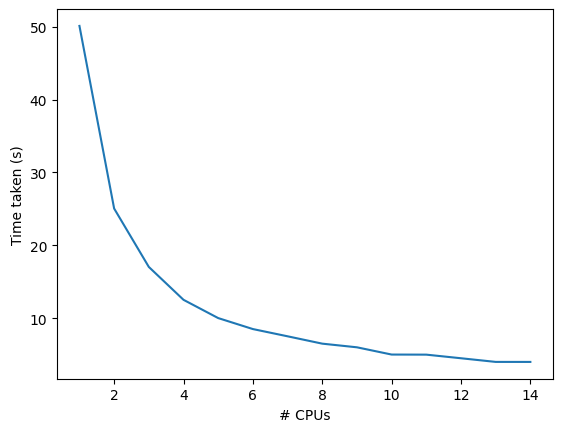

In [18]:
plt.plot(np.arange(1,15),Times_2nd_try)
plt.ylabel("Time taken (s)")
plt.xlabel("# CPUs")
plt.show()

As expected, the time taken decreases sharply with the increase of CPU numbers until 8 (the number of CPUs in my machine), then it starts flattening.
It is curious that it is still decreasing, even if the decrease is slower.

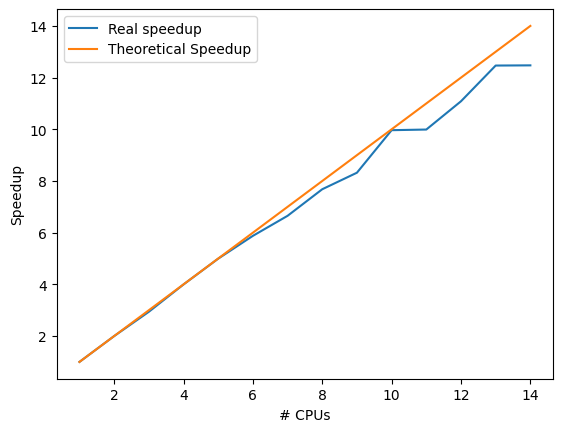

In [19]:
Times_2nd_try = np.array(Times_2nd_try)
Speedup = Times_2nd_try[0]/Times_2nd_try
plt.plot(np.arange(1,15),Speedup,label="Real speedup")
plt.plot(np.arange(1,15),np.arange(1,15),label="Theoretical Speedup")
plt.ylabel("Speedup")
plt.xlabel("# CPUs")
plt.legend()
plt.show()

Here, the speedup is almost equal to the theoretical one. It starts decreasing significantly when adding a lot of CPUs, probably beacuse also the amount of overhead is increasing faster than the speedup given by the number of CPUs.
